In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS

In [4]:
ops_data = pd.read_excel('Cleaned Dataset.xlsx', sheet_name='Ops People Data')
ops_data.info()
ops_data.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Period               240 non-null    object 
 1   Plant                240 non-null    object 
 2   Staffing %           240 non-null    float64
 3   Absenteeism %        240 non-null    float64
 4   Turnover %           240 non-null    float64
 5   Turnover 1st Year %  240 non-null    float64
 6   Tenure <2 %          240 non-null    float64
 7   Tenure >10 %         240 non-null    float64
 8   Efficiency %         240 non-null    float64
 9   Spoilage %           240 non-null    float64
 10  TRIR safety          240 non-null    float64
 11  HFI quality          240 non-null    float64
dtypes: float64(10), object(2)
memory usage: 22.6+ KB


<bound method NDFrame.head of       Period     Plant  Staffing %  Absenteeism %  Turnover %  \
0    2022_01  Plant_01   -0.031250         0.0720       0.000   
1    2022_02  Plant_01   -0.023438         0.0452       0.000   
2    2022_03  Plant_01    0.015625         0.0456       0.000   
3    2022_04  Plant_01    0.007812         0.0450       0.016   
4    2022_05  Plant_01   -0.015625         0.0648       0.032   
..       ...       ...         ...            ...         ...   
235  2022_11  Plant_16    0.000000         0.0530       0.028   
236  2022_12  Plant_16   -0.009050         0.0420       0.009   
237  2023_01  Plant_16   -0.026316         0.0386       0.009   
238  2023_02  Plant_16   -0.030568         0.0357       0.005   
239  2023_03  Plant_16   -0.030435         0.0422       0.009   

     Turnover 1st Year %  Tenure <2 %  Tenure >10 %  Efficiency %  Spoilage %  \
0                  0.000        0.864         0.032        0.7930      0.0171   
1                  0.000   

In [5]:
ops_data['Period'] = pd.to_datetime(ops_data['Period'], format='%Y_%m')

# Loop through columns and multiply numeric values by 100
for col in ops_data.columns:
    if pd.api.types.is_numeric_dtype(ops_data[col]):
        ops_data[col] *= 100


ops_data.head()

,Period,Plant,Staffing %,Absenteeism %,Turnover %,Turnover 1st Year %,Tenure <2 %,Tenure >10 %,Efficiency %,Spoilage %,TRIR safety,HFI quality
0,2022-01-01,Plant_01,-3.12500,7.20,0.0,0.0,86.4,3.2,79.3,1.71,0.0,0.80
1,2022-02-01,Plant_01,-2.34375,4.52,0.0,0.0,86.3,3.2,81.7,1.51,0.0,0.37
2,2022-03-01,Plant_01,1.56250,4.56,0.0,0.0,85.2,3.1,81.6,10.33,0.0,0.32
3,2022-04-01,Plant_01,0.78125,4.50,1.6,50.0,85.8,3.1,78.7,2.43,0.0,0.56
4,2022-05-01,Plant_01,-1.56250,6.48,3.2,75.0,86.4,2.4,81.6,3.05,0.0,1.52


# Operational Metrics Box plots

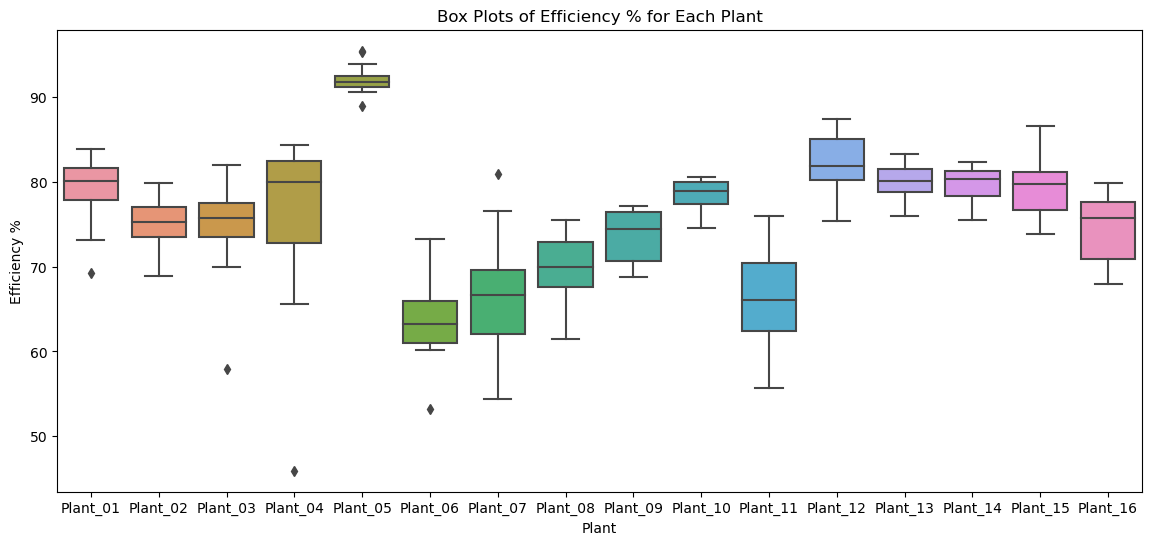

,count,mean,std,min,25%,50%,75%,max
Plant,,,,,,,,
Plant_01,15.0,78.880000,4.047786,69.20,77.900,80.10,81.600000,83.90
Plant_02,15.0,74.834000,3.281650,68.85,73.505,75.29,76.990000,79.90
Plant_03,15.0,74.576000,5.434710,57.90,73.450,75.70,77.500000,82.04
Plant_04,15.0,75.890667,10.055289,45.92,72.770,80.00,82.500000,84.35
Plant_05,15.0,92.102000,1.700354,89.00,91.250,91.74,92.495000,95.50
Plant_06,15.0,63.452000,4.512236,53.20,60.950,63.28,65.950000,73.20
Plant_07,15.0,66.566667,7.157383,54.40,62.055,66.65,69.610000,80.98
Plant_08,15.0,69.884000,4.151490,61.40,67.570,70.00,72.850000,75.51
Plant_09,15.0,73.670667,3.009894,68.79,70.675,74.42,76.405000,77.10


In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Plant', y='Efficiency %', data=ops_data)
plt.title('Box Plots of Efficiency % for Each Plant')
plt.xlabel('Plant')
plt.ylabel('Efficiency %')
plt.show()

ops_data.groupby('Plant')['Efficiency %'].describe()

Insights:

**Better peformance with high variability is also bad similar to poor performance with consistency**

1. Efficiency of plant 5 is the highest with less variability (5 %), centred slightly above 90 %. 12th is second in efficency.
2. Plant 6 with lowest median efficiency (63%).
3. 7th, 4th and 11th demonstrate higher variability
4. After 5th - 10th, 13th, 14th have less variability.

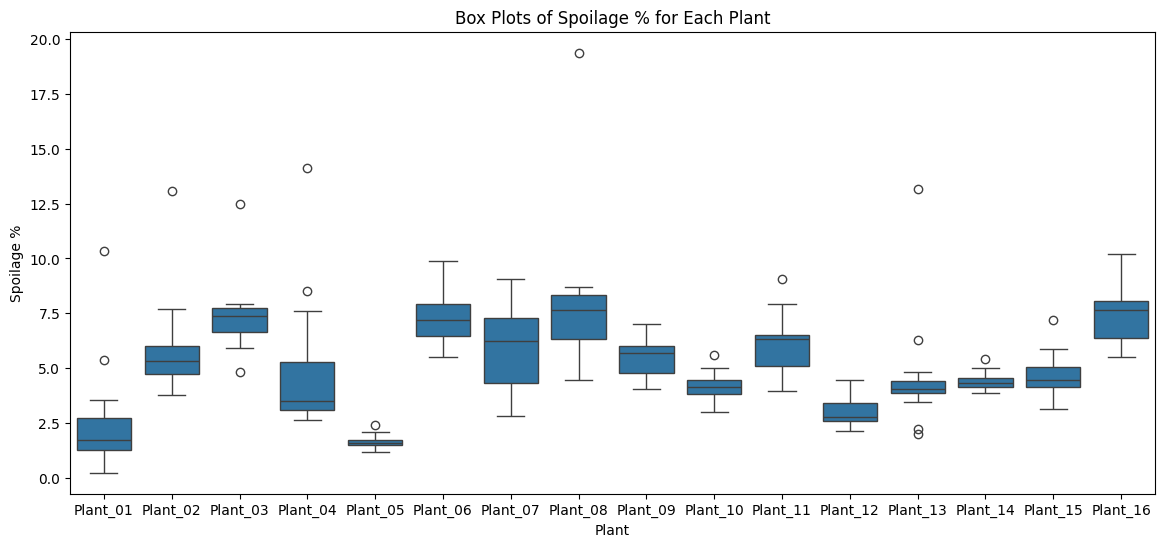

,count,mean,std,min,25%,50%,75%,max
Plant,,,,,,,,
Plant_01,15.0,2.485333,2.549308,0.230000,1.265000,1.710000,2.740,10.33
Plant_02,15.0,5.819333,2.236178,3.750000,4.720000,5.330000,6.005,13.06
Plant_03,15.0,7.334000,1.665545,4.830000,6.635000,7.390000,7.755,12.46
Plant_04,15.0,4.843333,3.126506,2.630000,3.100000,3.490000,5.265,14.13
Plant_05,15.0,1.633333,0.293615,1.180000,1.470000,1.560000,1.725,2.39
Plant_06,15.0,7.391925,1.313296,5.504669,6.452725,7.207951,7.935,9.87
Plant_07,15.0,5.942000,2.115883,2.830000,4.300000,6.210000,7.300,9.08
Plant_08,15.0,7.908667,3.450960,4.440000,6.320000,7.650000,8.335,19.39
Plant_09,15.0,5.481333,0.891474,4.060000,4.780000,5.680000,5.985,7.01


In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Plant', y='Spoilage %', data=ops_data)
plt.title('Box Plots of Spoilage % for Each Plant')
plt.xlabel('Plant')
plt.ylabel('Spoilage %')
plt.show()

ops_data.groupby('Plant')['Spoilage %'].describe()

Insights:
1. Plant 5 has less spoilage and variability centred slightly below 2.5%.
2. Plant 8 with high spoilage followed by 16th and 6th.

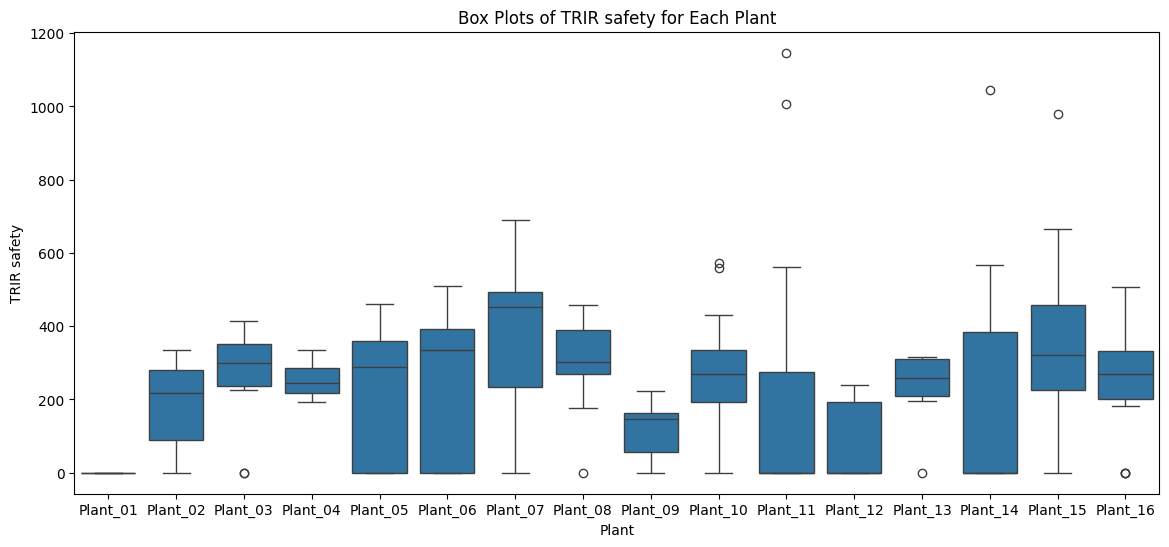

,count,mean,std,min,25%,50%,75%,max
Plant,,,,,,,,
Plant_01,15.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Plant_02,15.0,182.333333,121.121938,0.0,89.50,216.0,279.5,336.0
Plant_03,15.0,267.933333,123.133184,0.0,236.50,298.0,352.5,413.0
Plant_04,15.0,253.446667,42.033913,194.0,217.35,245.0,286.0,336.0
Plant_05,15.0,228.866667,174.899917,0.0,0.00,288.0,359.5,461.0
Plant_06,15.0,254.533333,196.205383,0.0,0.00,334.0,393.0,510.0
Plant_07,15.0,363.533333,232.410003,0.0,232.50,453.0,493.0,690.0
Plant_08,15.0,307.333333,114.153197,0.0,268.50,303.0,388.5,459.0
Plant_09,15.0,115.600000,76.958059,0.0,56.50,147.0,164.0,223.0


In [7]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Plant', y='TRIR safety', data=ops_data)
plt.title('Box Plots of TRIR safety for Each Plant')
plt.xlabel('Plant')
plt.ylabel('TRIR safety')
plt.show()

ops_data.groupby('Plant')['TRIR safety'].describe()

Insights:
1. Plant 1 demonstrates less safety issues with 0.
2. More issues are in plant 7

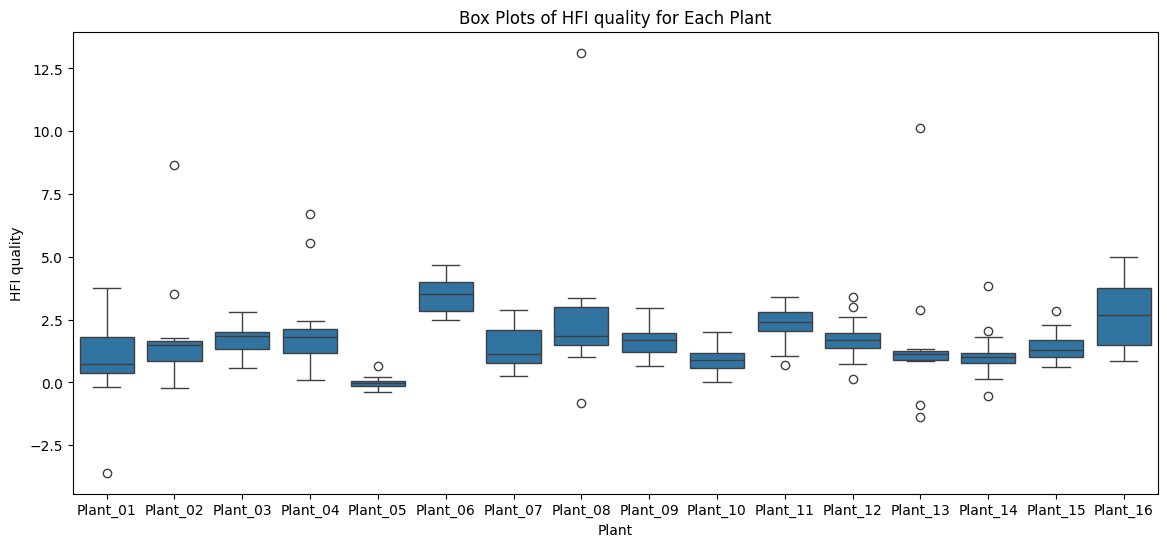

,count,mean,std,min,25%,50%,75%,max
Plant,,,,,,,,
Plant_01,15.0,0.884667,1.648029,-3.59,0.355000,0.72,1.805,3.76
Plant_02,15.0,1.746800,2.099287,-0.21,0.835000,1.48,1.645,8.66
Plant_03,15.0,1.701333,0.596644,0.57,1.310000,1.84,1.990,2.79
Plant_04,15.0,2.130698,1.734287,0.11,1.175000,1.81,2.135,6.70
Plant_05,15.0,-0.021333,0.245818,-0.39,-0.160000,-0.03,0.045,0.67
Plant_06,15.0,3.474667,0.684020,2.47,2.825000,3.51,3.995,4.69
Plant_07,15.0,1.402000,0.923295,0.25,0.765000,1.14,2.105,2.89
Plant_08,15.0,2.715333,3.081599,-0.81,1.490000,1.83,2.995,13.13
Plant_09,15.0,1.667333,0.669045,0.65,1.195000,1.70,1.970,2.98


In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Plant', y='HFI quality', data=ops_data)
plt.title('Box Plots of HFI quality for Each Plant')
plt.xlabel('Plant')
plt.ylabel('HFI quality')
plt.show()

ops_data.groupby('Plant')['HFI quality'].describe()

Insights;
1. Plant 5 has the lowest quality issues.
2. Plant 6 has moer issues

# Standard deviation Vs Avg of operational metrics - Plant level

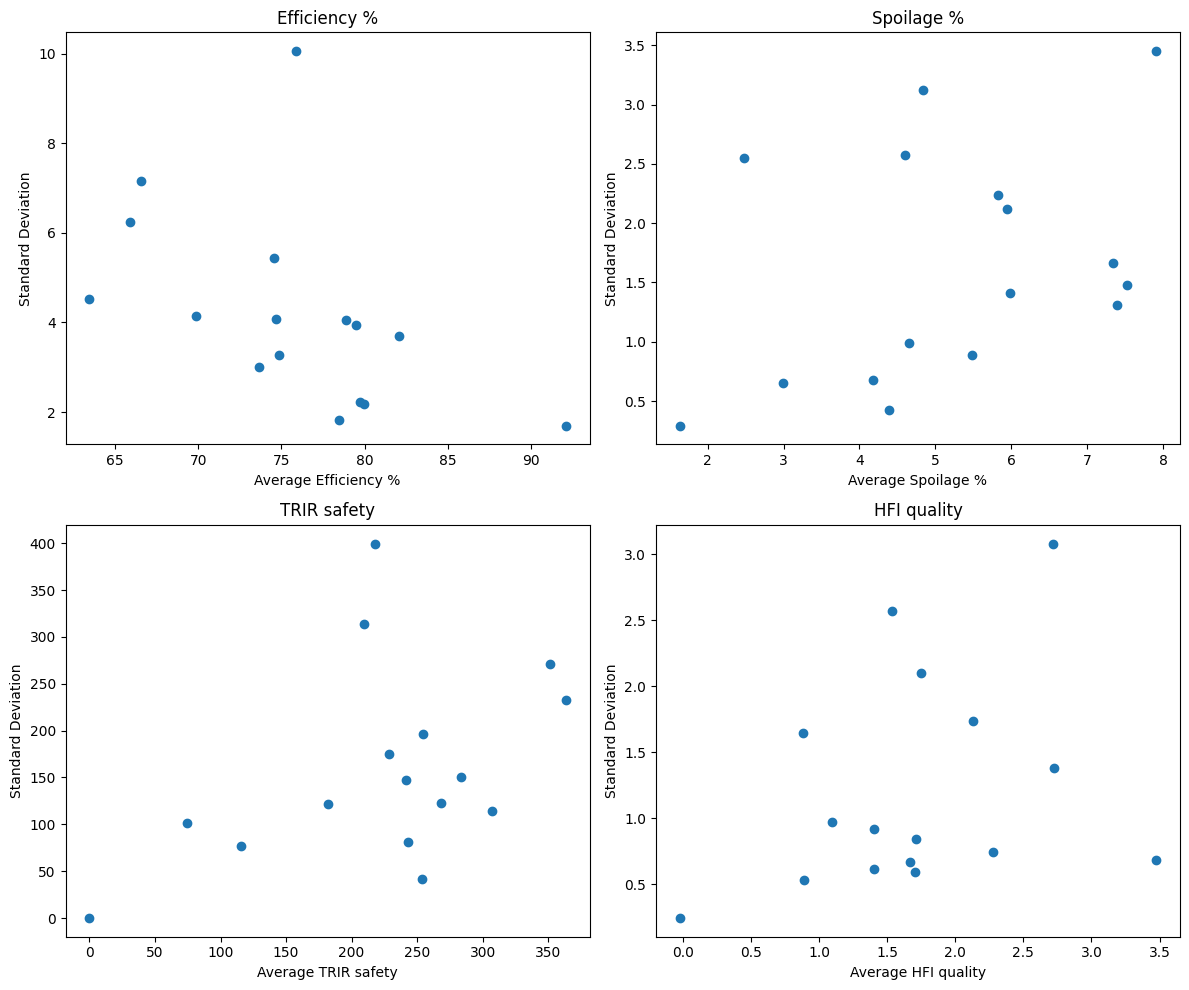

In [9]:
# Group data by 'Plant' to get the average and standard deviation of each metric for each plant
plant_metrics_summary = ops_data.groupby('Plant').agg({'Efficiency %': ['mean', 'std'],
                                                       'Spoilage %': ['mean', 'std'],
                                                       'TRIR safety': ['mean', 'std'],
                                                       'HFI quality': ['mean', 'std']})

# Flatten the multi-index columns
plant_metrics_summary.columns = [' '.join(col).strip() for col in plant_metrics_summary.columns.values]

# Plot scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for Efficiency %
axes[0, 0].scatter(plant_metrics_summary['Efficiency % mean'], plant_metrics_summary['Efficiency % std'])
axes[0, 0].set_title('Efficiency %')
axes[0, 0].set_xlabel('Average Efficiency %')
axes[0, 0].set_ylabel('Standard Deviation')

# Scatter plot for Spoilage %
axes[0, 1].scatter(plant_metrics_summary['Spoilage % mean'], plant_metrics_summary['Spoilage % std'])
axes[0, 1].set_title('Spoilage %')
axes[0, 1].set_xlabel('Average Spoilage %')
axes[0, 1].set_ylabel('Standard Deviation')

# Scatter plot for TRIR safety
axes[1, 0].scatter(plant_metrics_summary['TRIR safety mean'], plant_metrics_summary['TRIR safety std'])
axes[1, 0].set_title('TRIR safety')
axes[1, 0].set_xlabel('Average TRIR safety')
axes[1, 0].set_ylabel('Standard Deviation')

# Scatter plot for HFI quality
axes[1, 1].scatter(plant_metrics_summary['HFI quality mean'], plant_metrics_summary['HFI quality std'])
axes[1, 1].set_title('HFI quality')
axes[1, 1].set_xlabel('Average HFI quality')
axes[1, 1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Clustering Plants based on operational metrics

In [10]:
# Selecting only the average metrics columns
average_metrics = plant_metrics_summary[['Efficiency % mean', 'Spoilage % mean', 'TRIR safety mean', 'HFI quality mean']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_metrics = scaler.fit_transform(average_metrics)

# Convert the scaled data back to a DataFrame
scaled_metrics_df = pd.DataFrame(scaled_metrics, columns=average_metrics.columns)

# Check the scaled DataFrame
print(scaled_metrics_df.head())

   Efficiency % mean  Spoilage % mean  TRIR safety mean  HFI quality mean
0           0.475166        -1.515715         -2.430797         -1.011616
1          -0.116820         0.347849         -0.458017          0.046867
2          -0.154569         1.194484          0.468143         -0.008955
3           0.037785        -0.197693          0.311402          0.518198
4           2.409730        -1.991947          0.045456         -2.123957


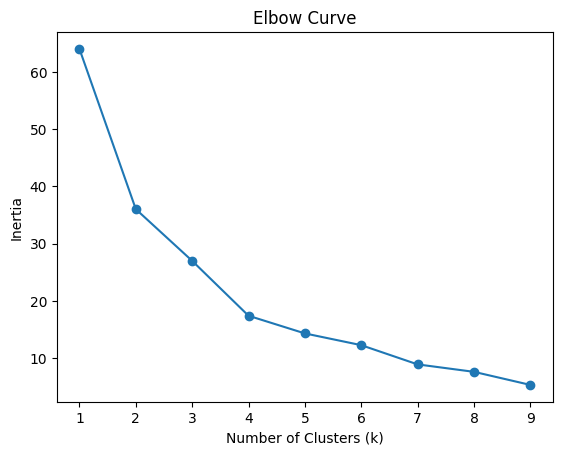

In [11]:
# Calculate the elbow curve
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [12]:
# Fit KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_metrics)

# Add cluster labels to the scaled_metrics_df DataFrame
scaled_metrics_df['Cluster'] = kmeans.labels_

# Check the first few rows of the DataFrame with cluster labels
print(scaled_metrics_df.head())

   Efficiency % mean  Spoilage % mean  TRIR safety mean  HFI quality mean  \
0           0.475166        -1.515715         -2.430797         -1.011616   
1          -0.116820         0.347849         -0.458017          0.046867   
2          -0.154569         1.194484          0.468143         -0.008955   
3           0.037785        -0.197693          0.311402          0.518198   
4           2.409730        -1.991947          0.045456         -2.123957   

   Cluster  
0        2  
1        3  
2        4  
3        4  
4        1  


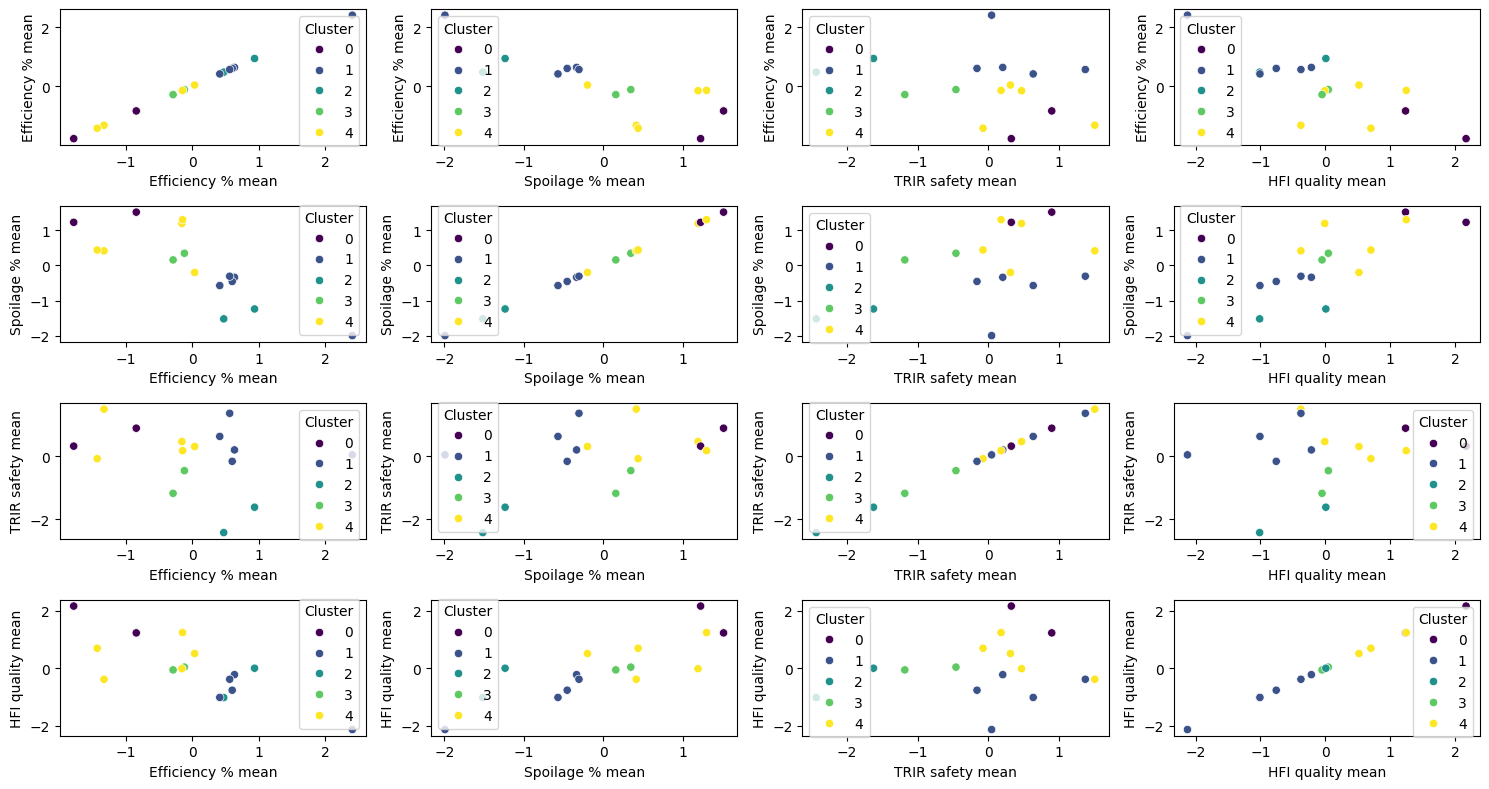

In [13]:
# Define the base metrics and their respective axes
base_metrics = ['Efficiency % mean', 'Spoilage % mean', 'TRIR safety mean', 'HFI quality mean']

# Create subplots for each base metric
fig, axes = plt.subplots(len(base_metrics), len(average_metrics.columns), figsize=(15, 8))

# Iterate through each base metric
for i, base_metric in enumerate(base_metrics):
    # Iterate through each average metric
    for j, avg_metric in enumerate(average_metrics.columns):
        # Scatter plot with color coding for clusters
        sns.scatterplot(data=scaled_metrics_df, x=avg_metric, y=base_metric, hue='Cluster', palette='viridis', ax=axes[i, j])
        axes[i, j].set_xlabel(avg_metric)
        axes[i, j].set_ylabel(base_metric)
        axes[i, j].legend(title='Cluster')

plt.tight_layout()
plt.show()

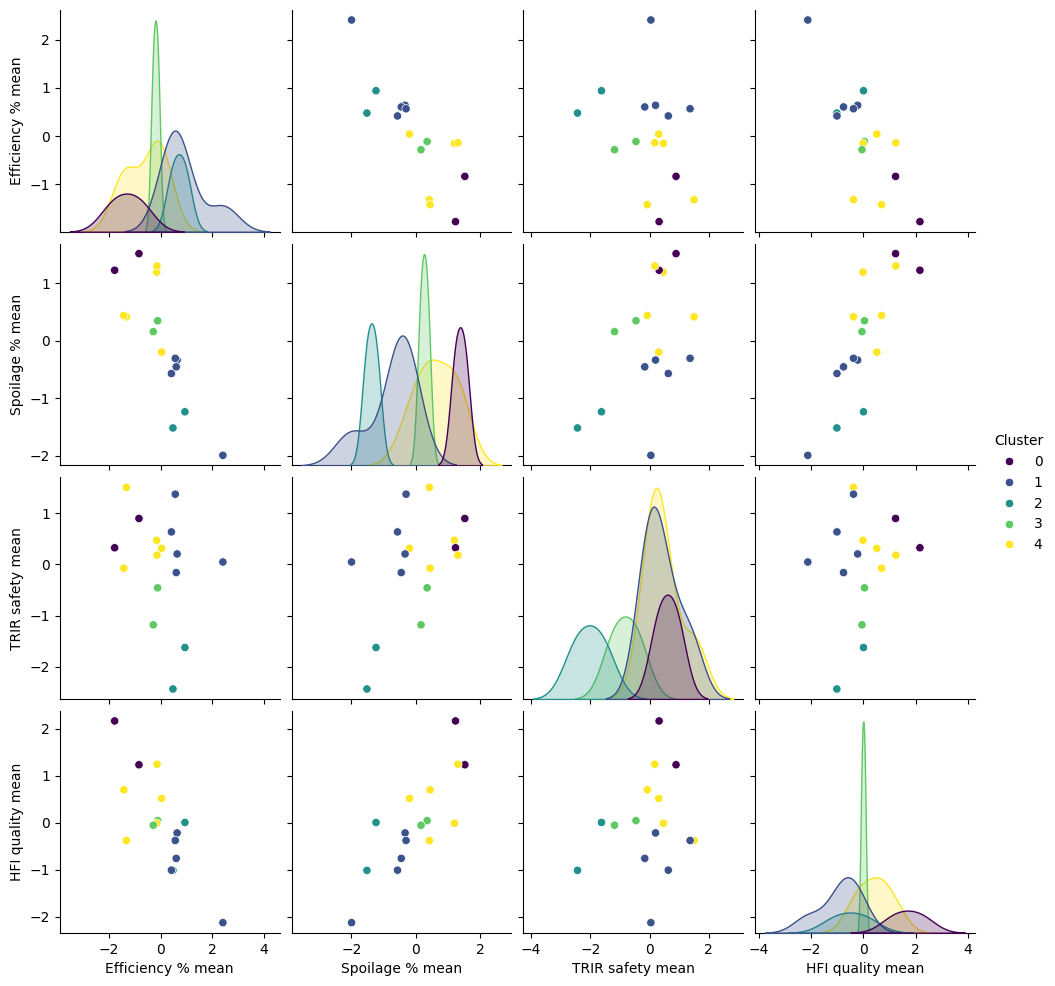

In [14]:
# Plot scatter plots for each pair of metrics
sns.pairplot(data=scaled_metrics_df, vars=['Efficiency % mean', 'Spoilage % mean', 'TRIR safety mean', 'HFI quality mean'], hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

# Scatter Plots operational metrics vs other variables

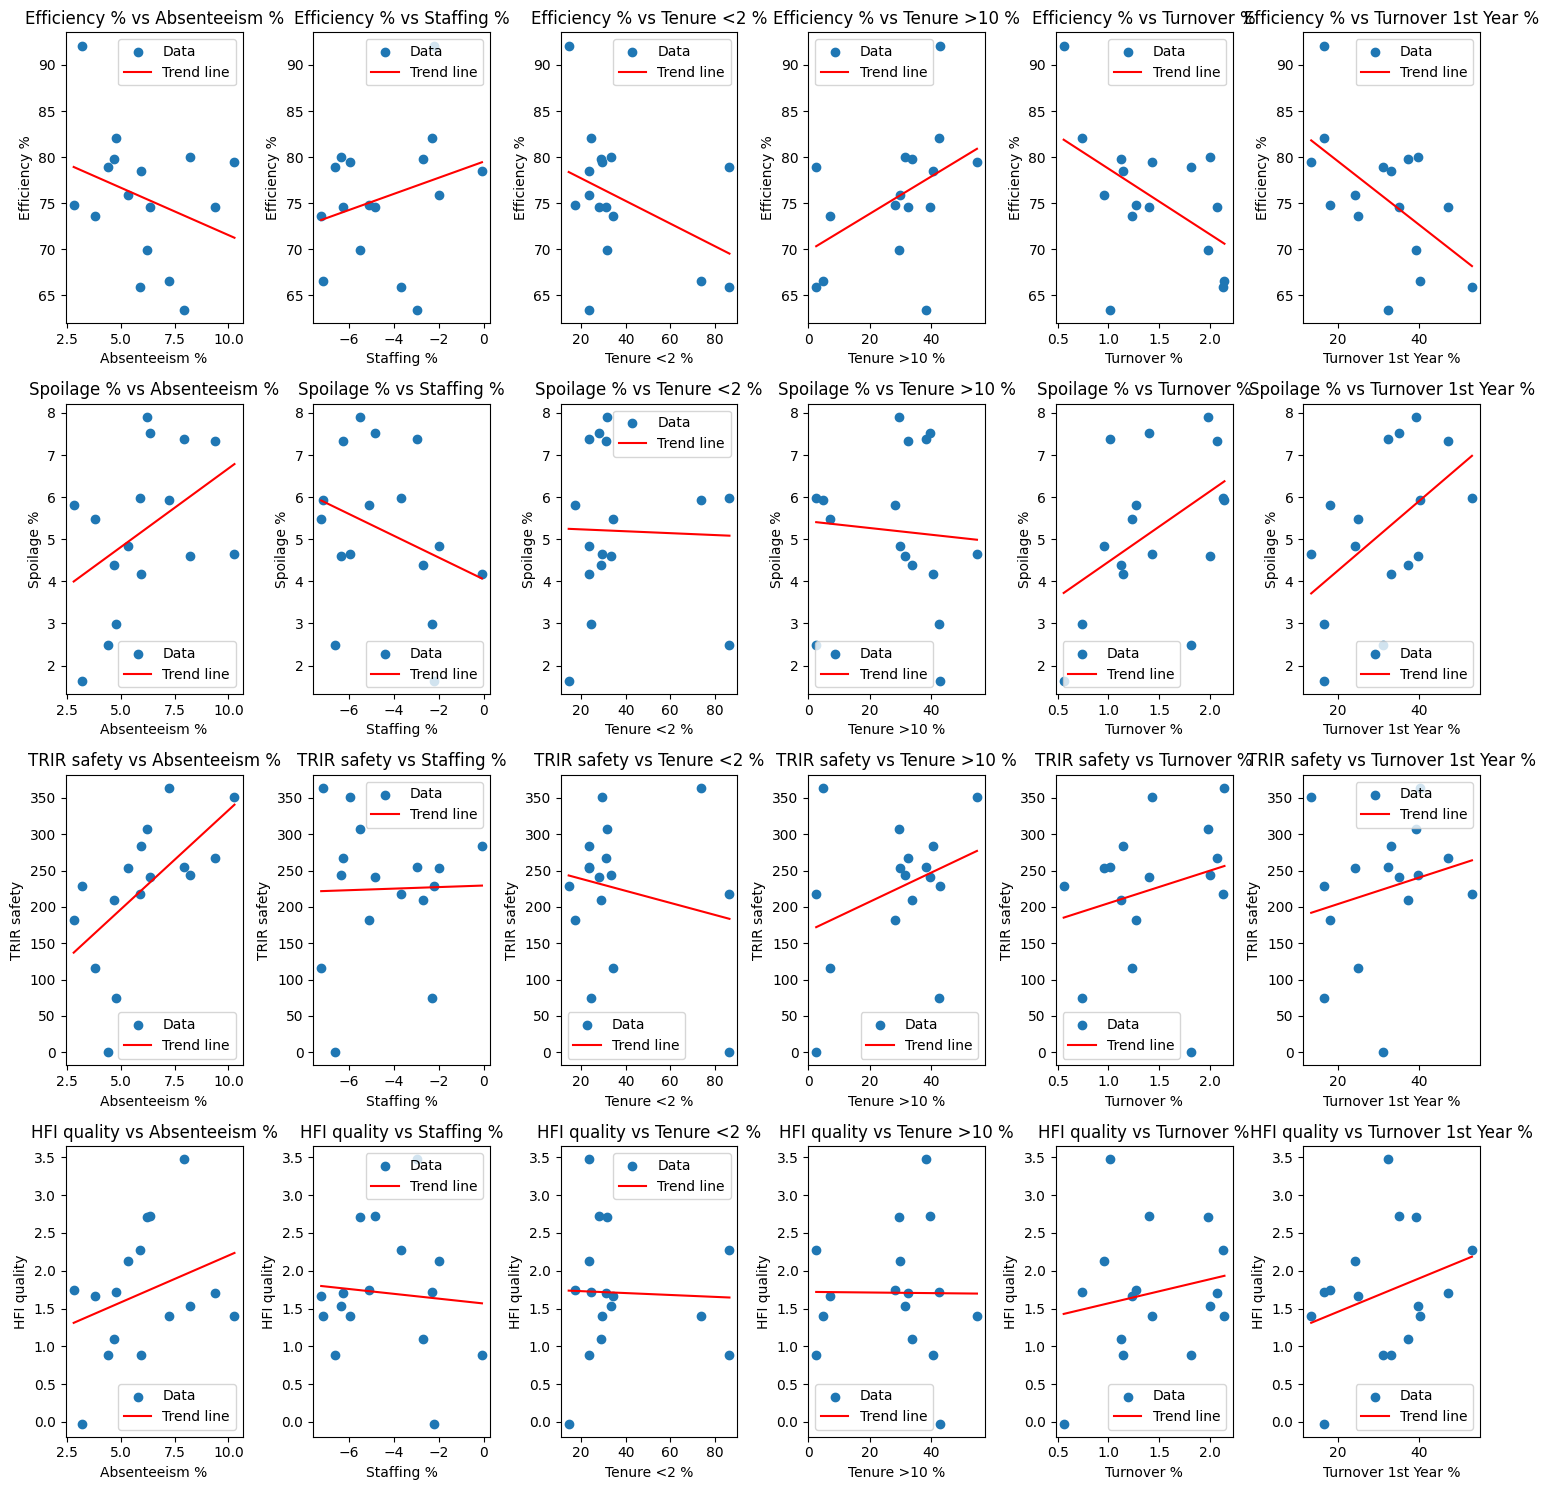

In [15]:
# Calculate the average of all metrics for each plant (excluding 'Period')
ops_data_avg = ops_data.groupby('Plant').mean().drop(columns=['Period'])

# Plot scatter plots of operational metrics vs other metrics
operational_metrics = ['Efficiency %', 'Spoilage %', 'TRIR safety', 'HFI quality']
other_metrics = ops_data_avg.columns.difference(operational_metrics)

# Number of rows and columns for subplots
n_rows = len(operational_metrics)
n_cols = len(other_metrics)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Plot scatter plots for each operational metric against other metrics
for i, op_metric in enumerate(operational_metrics):
    for j, other_metric in enumerate(other_metrics):
        # Scatter plot
        axes[i, j].scatter(ops_data_avg[other_metric], ops_data_avg[op_metric], label='Data')
        
        # Fit a linear regression line
        lr = LinearRegression()
        lr.fit(ops_data_avg[other_metric].values.reshape(-1, 1), ops_data_avg[op_metric])
        trend_line = lr.predict(np.array([[min(ops_data_avg[other_metric])], [max(ops_data_avg[other_metric])]]))
        
        # Plot trend line
        axes[i, j].plot([min(ops_data_avg[other_metric]), max(ops_data_avg[other_metric])], trend_line, color='red', label='Trend line')
        
        # Set labels and title
        axes[i, j].set_xlabel(other_metric)
        axes[i, j].set_ylabel(op_metric)
        axes[i, j].set_title(f'{op_metric} vs {other_metric}')
        axes[i, j].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation

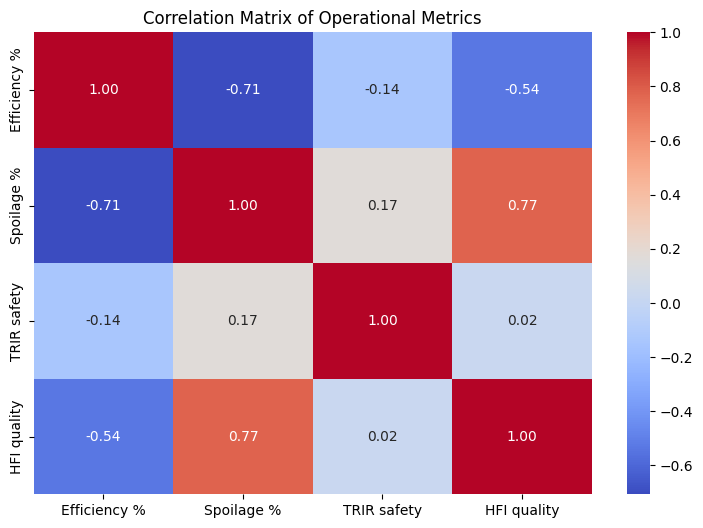

In [16]:
ops_data_operational = ops_data[operational_metrics]

# Calculate the correlation matrix for operational metrics
correlation_matrix_operational = ops_data_operational.corr()

# Plotting the correlation matrix for operational metrics
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix_operational, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Operational Metrics')
plt.show()

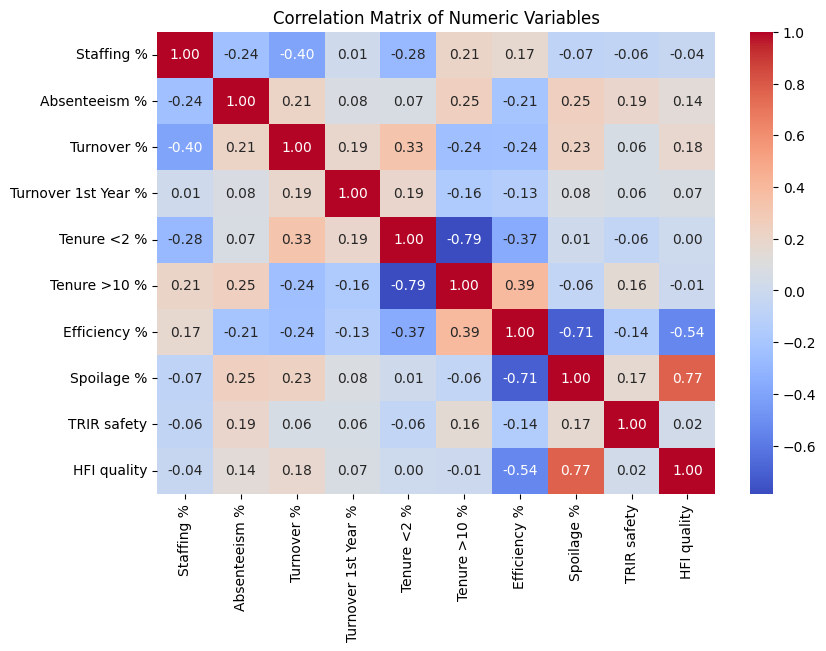

In [17]:
correlation_matrix = ops_data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# OLS

Efficiency

In [18]:
# Define the formula for the regression model
formula = 'Q("Efficiency %") ~ C(Plant) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Efficiency %")   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     29.08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.61e-49
Time:                        16:25:02   Log-Likelihood:                -695.29
No. Observations:                 240   AIC:                             1431.
Df Residuals:                     220   BIC:                             1500.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               79.1378 

Spoilage

In [19]:
# Define the formula for the regression model
formula = 'Q("Spoilage %") ~ C(Plant) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Q("Spoilage %")   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     12.19
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.30e-25
Time:                        16:25:02   Log-Likelihood:                -478.09
No. Observations:                 240   AIC:                             996.2
Df Residuals:                     220   BIC:                             1066.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2567 

Safety

In [20]:
# Define the formula for the regression model
formula = 'Q("TRIR safety") ~ C(Plant) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("TRIR safety")   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3.219
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.64e-05
Time:                        16:25:02   Log-Likelihood:                -1587.3
No. Observations:                 240   AIC:                             3215.
Df Residuals:                     220   BIC:                             3284.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.4471 

Quality

In [21]:
# Define the formula for the regression model
formula = 'Q("HFI quality") ~ C(Plant) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("HFI quality")   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     4.519
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.23e-08
Time:                        16:25:02   Log-Likelihood:                -415.69
No. Observations:                 240   AIC:                             871.4
Df Residuals:                     220   BIC:                             941.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4831 

OLS with period

In [22]:
# Define the formula for the regression model
formula = 'Q("Efficiency %") ~ C(Plant) + C(Period) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Efficiency %")   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     18.13
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.28e-44
Time:                        16:25:02   Log-Likelihood:                -682.58
No. Observations:                 240   AIC:                             1433.
Df Residuals:                     206   BIC:                             1551.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [23]:
# Define the formula for the regression model
formula = 'Q("Spoilage %") ~ C(Plant) + C(Period) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Q("Spoilage %")   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     7.547
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.49e-21
Time:                        16:25:02   Log-Likelihood:                -469.30
No. Observations:                 240   AIC:                             1007.
Df Residuals:                     206   BIC:                             1125.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [24]:
# Define the formula for the regression model
formula = 'Q("TRIR safety") ~ C(Plant) + C(Period) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("TRIR safety")   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3.162
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           2.99e-07
Time:                        16:25:02   Log-Likelihood:                -1567.5
No. Observations:                 240   AIC:                             3203.
Df Residuals:                     206   BIC:                             3321.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [25]:
# Define the formula for the regression model
formula = 'Q("HFI quality") ~ C(Plant) + C(Period) + Q("Staffing %") + Q("Absenteeism %") + Q("Turnover %") + Q("Tenure >10 %")'

# Fit the linear regression model
model = smf.ols(formula=formula, data=ops_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("HFI quality")   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3.266
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.32e-07
Time:                        16:25:02   Log-Likelihood:                -404.73
No. Observations:                 240   AIC:                             877.5
Df Residuals:                     206   BIC:                             995.8
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

# Fixed Effect

Efficiency

In [26]:
# Make sure the Period column is in datetime format and set as index along with Plant
ops_data['Period'] = pd.to_datetime(ops_data['Period'])
ops_data = ops_data.set_index(['Plant', 'Period'])

# Selecting the explanatory variables, assuming these are all the columns except 'Efficiency %'
exog_vars = ops_data.columns.difference(['Efficiency %'])
exog = sm.add_constant(ops_data[exog_vars])  # Add a constant term for the regression intercept

# The dependent variable
endog = ops_data['Efficiency %']

# Fit the fixed effects model
model = PanelOLS(endog, exog, entity_effects=True)  # entity_effects=True will include fixed effects for each Plant
fe_results = model.fit()

# Display the model summary
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:           Efficiency %   R-squared:                        0.4572
Estimator:                   PanelOLS   R-squared (Between):             -0.5234
No. Observations:                 240   R-squared (Within):               0.4572
Date:                Tue, Apr 02 2024   R-squared (Overall):             -0.2214
Time:                        16:25:02   Log-likelihood                   -631.37
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.119
Entities:                          16   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                   F(9,215)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             20.119
                            

Spoilage

In [27]:
# Selecting the explanatory variables, assuming these are all the columns except 'Spoilage %'
exog_vars = ops_data.columns.difference(['Spoilage %'])
exog = sm.add_constant(ops_data[exog_vars])  # Add a constant term for the regression intercept

# The dependent variable
endog = ops_data['Spoilage %']

# Fit the fixed effects model
model = PanelOLS(endog, exog, entity_effects=True)  # entity_effects=True will include fixed effects for each Plant
fe_results = model.fit()

# Display the model summary
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Spoilage %   R-squared:                        0.7396
Estimator:                   PanelOLS   R-squared (Between):              0.5367
No. Observations:                 240   R-squared (Within):               0.7396
Date:                Tue, Apr 02 2024   R-squared (Overall):              0.6391
Time:                        16:25:02   Log-likelihood                   -320.82
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.867
Entities:                          16   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                   F(9,215)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             67.867
                            

Safety

In [28]:
# Selecting the explanatory variables, assuming these are all the columns except 'TRIR safety'
exog_vars = ops_data.columns.difference(['TRIR safety'])
exog = sm.add_constant(ops_data[exog_vars])  # Add a constant term for the regression intercept

# The dependent variable
endog = ops_data['TRIR safety']

# Fit the fixed effects model
model = PanelOLS(endog, exog, entity_effects=True)  # entity_effects=True will include fixed effects for each Plant
fe_results = model.fit()

# Display the model summary
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            TRIR safety   R-squared:                        0.0441
Estimator:                   PanelOLS   R-squared (Between):             -0.0924
No. Observations:                 240   R-squared (Within):               0.0441
Date:                Tue, Apr 02 2024   R-squared (Overall):              0.0160
Time:                        16:25:02   Log-likelihood                   -1583.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.1009
Entities:                          16   P-value                           0.3633
Avg Obs:                       15.000   Distribution:                   F(9,215)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             1.1009
                            

Quality

In [29]:
# Selecting the explanatory variables, assuming these are all the columns except 'HFI quality'
exog_vars = ops_data.columns.difference(['HFI quality'])
exog = sm.add_constant(ops_data[exog_vars])  # Add a constant term for the regression intercept

# The dependent variable
endog = ops_data['HFI quality']

# Fit the fixed effects model
model = PanelOLS(endog, exog, entity_effects=True)  # entity_effects=True will include fixed effects for each Plant
fe_results = model.fit()

# Display the model summary
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            HFI quality   R-squared:                        0.6494
Estimator:                   PanelOLS   R-squared (Between):             -0.0272
No. Observations:                 240   R-squared (Within):               0.6494
Date:                Tue, Apr 02 2024   R-squared (Overall):              0.4768
Time:                        16:25:02   Log-likelihood                   -294.11
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      44.258
Entities:                          16   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                   F(9,215)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             44.258
                            

In [7]:
# Make sure the Period column is in datetime format and set as index along with Plant
ops_data['Period'] = pd.to_datetime(ops_data['Period'])
ops_data = ops_data.set_index(['Plant', 'Period'])

# Selecting the explanatory variables, assuming these are all the columns except 'Efficiency %'
exog_vars = ops_data.columns.difference(['Spoilage %'])
exog = sm.add_constant(ops_data[exog_vars])  # Add a constant term for the regression intercept

# The dependent variable
endog = ops_data['Spoilage %']

# Fit the fixed effects model
model = PanelOLS(endog, exog, entity_effects=True)  # entity_effects=True will include fixed effects for each Plant
fe_results = model.fit()

# Display the model summary
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Spoilage %   R-squared:                        0.7396
Estimator:                   PanelOLS   R-squared (Between):              0.5367
No. Observations:                 240   R-squared (Within):               0.7396
Date:                Wed, Apr 03 2024   R-squared (Overall):              0.6391
Time:                        00:16:08   Log-likelihood                   -320.82
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.867
Entities:                          16   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                   F(9,215)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             67.867
                            

Random Forest and PDP

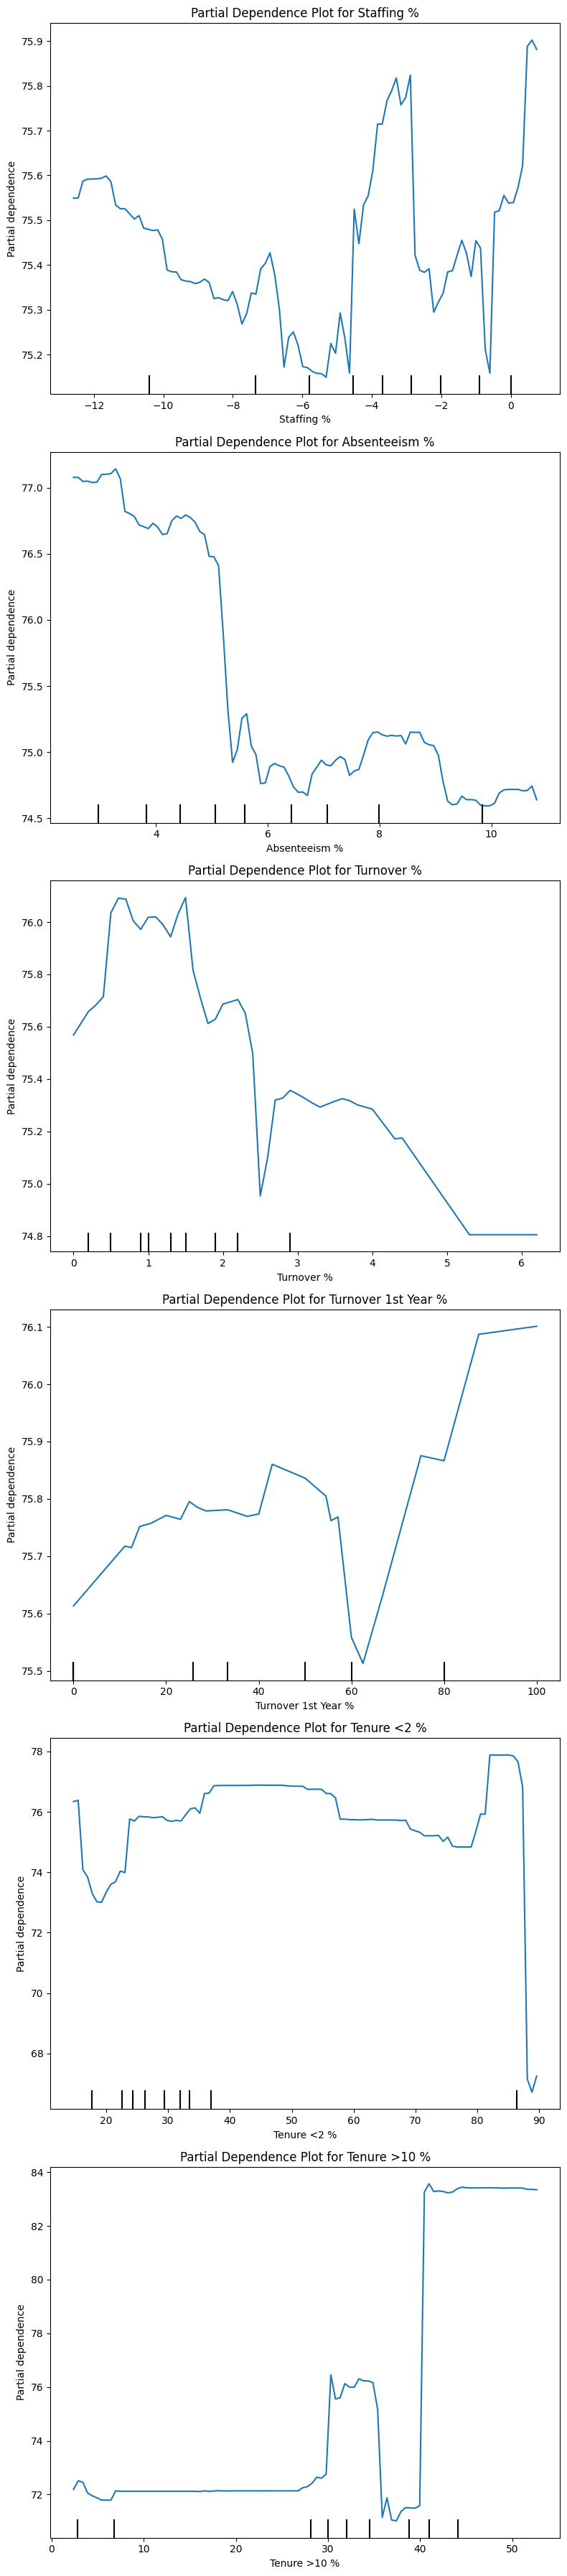

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# Selecting the features for which you want to generate PDPs
features = ['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %']

# Splitting the data into features (X) and target variable (y)
X = ops_data[features]
y = ops_data['Efficiency %']

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Plot the partial dependence plots
fig, axs = plt.subplots(len(features), 1, figsize=(8, 6 * len(features)))
for i, feature in enumerate(features):
    display = PartialDependenceDisplay.from_estimator(rf_model, X, features=[i], ax=axs[i])
    axs[i].set_title(f'Partial Dependence Plot for {feature}')
plt.tight_layout()
plt.show()